## Task 0 Install Required Libraries

In [29]:
import timeit
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
from scipy.optimize import curve_fit

## Introduction
This project is designed to deepen our understanding of algorithm analysis and the application of search algorithms. Through a series of tasks, we will explore the efficiency, speed, and practical implementation of different algorithms in Python.

There are three main tasks within this project each of which contain their own description and discussion. The tasks are as follows:
- Task 1: Writing a pseudocode factorial function
- Task 2: Comparing the effeciency of Iterative, Tail Recursive, and Non-Tail Recursive factorial functions
- Task 3: Comparing the effeciency of Linear Search and Binary Search algorithms

## Task 1
### Write an algorithm in pseudo-code to compute the factorial of a positive integer n


FUNCTION factorial(n) <br>
IF n == 0 OR n == 1 THEN <br>
RETURN 1 <br>
ELSE <br>
RETURN n * factorial(n - 1) <br>
END FUNCTION <br>


### Complexity Analysis:
- **Time Complexity:** O(n)
  - The time complexity is O(n) because the factorial function is called n times recursively until the base case (n == 0 or n == 1) is reached. For each function call, a constant amount of work is done.

- **Space Complexity:** O(n)
  - The space complexity is also O(n), as it depends on the height of the call stack, which grows linearly with n due to the recursive calls.



### Number of Operations:
- factorial(n): 2 operations (function call, assignment)
- IF n == 0 OR n == 1: 3 operations
- RETURN 1: 1 operation (last case)
- RETURN n * factorial(n - 1): 4 operations (return, multiplication, subtraction, function call)

**Time Complexity:**  9n - 3 

### Theoretical Graph of the factorial function:
The Time Complexity of the factorial function is O(9n - 3), which means the time taken to compute the factorial of a number increases linearly with the input size. The graph of the factorial function would be a straight line as shown below:

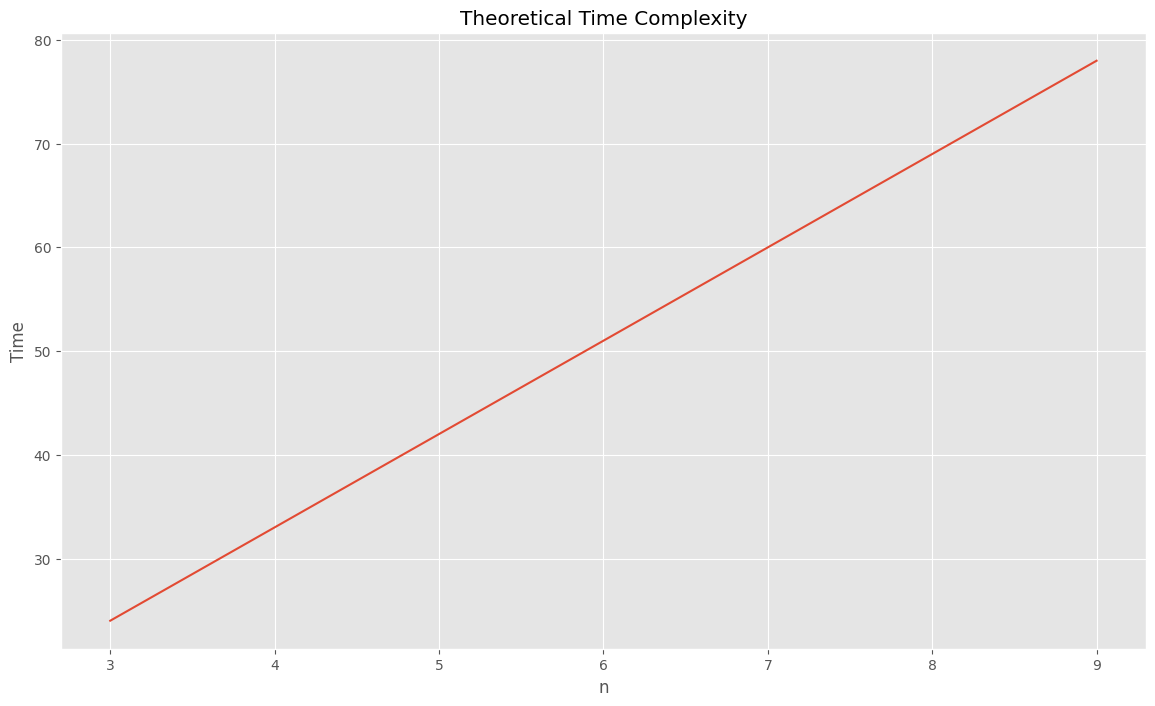

In [30]:
n = np.arange(3, 10)

# Calculate the corresponding time values using the formula 5n-1
time = 9 * n - 3
plt.figure(figsize=(14, 8))  # Set the figure size to 18x8
plt.plot(n, time)
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Theoretical Time Complexity')
plt.show()


## Task 2
### Write 3 factorial functions to compute the factorial of a positive integer n. You should create 1 iterative factorial algorithm, 1 tail-recursive factorial algorithm and 1 non-tail recursive algorithm

### 2.1 Iterative Factorial Algorithm

In [31]:
def iterative_factorial(n):
    factorial = 1
    for i in range(1, n+1):
        factorial *= i
    return factorial


## 2.2 Tail-Recursive Factorial Algorithm

In [32]:
def tail_recursive_factorial(n, factorial=1):
    if n == 0:
        return factorial
    else:
        return tail_recursive_factorial(n-1, factorial*n)


### 2.3 Non-Tail Recursive Factorial Algorithm

In [33]:
def non_tail_recursive_factorial(n):
    if n == 0:
        return 1
    else:
        return n * non_tail_recursive_factorial(n-1)


I created a function to run each function a number of times and return the average runtime of the function for a given input. This will allow us to compare the efficiency of the different factorial functions. Each function is being run a number of times to smooth out any errors and give a more accurate representation of the runtime.

In [34]:
def avg_time(func, n, num_trials=300):
    times = timeit.repeat(lambda: func(n), repeat=num_trials, number=1)
    return sum(times) / num_trials

I am using calculating the factorial of a range of numbers from 1 to 1000 in steps of 2. I will then plot the average runtimes of the three factorial functions to compare their efficiency.

In [35]:
input_range = range(1, 1000,2)
iterative_runtimes = []
tail_recursive_runtimes = []
non_tail_recursive_runtimes = []

for n in input_range:
    # Calculate the average runtime using the avg_time function
    iterative_runtimes.append(avg_time(iterative_factorial, n))
    tail_recursive_runtimes.append(avg_time(tail_recursive_factorial, n))
    non_tail_recursive_runtimes.append(avg_time(non_tail_recursive_factorial, n))


The Savitzky-Golay filter is used to smooth the data and make it easier to visualize the trends [1].

[1] https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [36]:
smoothed_iterative_runtimes = np.array(savgol_filter(iterative_runtimes, window_length=11, polyorder=2))
smoothed_tail_recursive_runtimes = np.array(savgol_filter(tail_recursive_runtimes, window_length=11, polyorder=2))
smoothed_non_tail_recursive_runtimes = np.array(savgol_filter(non_tail_recursive_runtimes, window_length=11, polyorder=2))


### Plot the results of the factorial functions for n = 1 to 1000

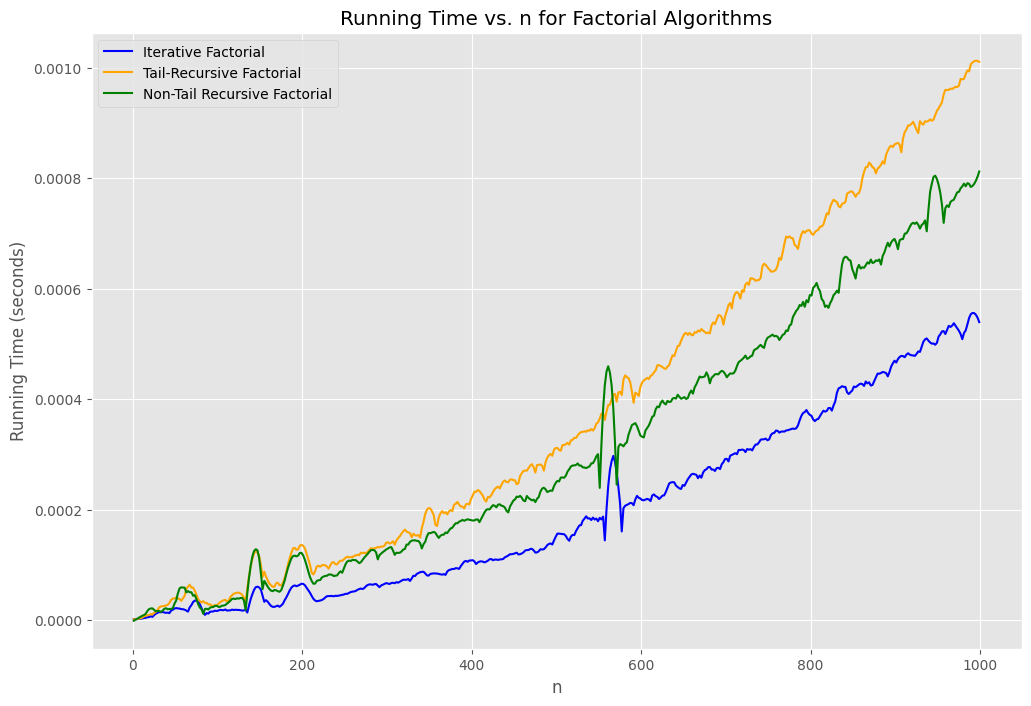

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(input_range, smoothed_iterative_runtimes, label='Iterative Factorial', color='blue')
plt.plot(input_range, smoothed_tail_recursive_runtimes, label='Tail-Recursive Factorial', color='orange')
plt.plot(input_range, smoothed_non_tail_recursive_runtimes, label='Non-Tail Recursive Factorial', color='green')
plt.xlabel('n')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. n for Factorial Algorithms')
plt.legend()
plt.show()


## Analysis of Factorial Algorithm Performance

The graph illustrates an unexpected trend where the tail-recursive algorithm (orange line) demonstrates a slower running time compared to the non-tail recursive version (green line). Tail recursion is generally optimised by compilers, which can transform the recursive process into iteration, reducing the call stack's size and the overall execution time. However, the tail-recursive algorithm's reduced performance might be attributed to several factors:

### Possible Factors Affecting Tail-Recursive Performance:

- **Compiler/Interpreter Optimisation**: 
  - The code execution environment may not be effectively optimizing tail recursion. Inadequate optimization can lead to the tail-recursive algorithm incurring additional overhead, despite its theoretically more efficient structure.

- **Implementation Details**: 
  - Specifics in the algorithm's implementation could contribute to reduced efficiency. For instance, extraneous operations within each recursive call could result in a slower execution time for the tail-recursive version.

- **Environmental Factors**: 
  - Variability in running times, particularly the spikes observed, may result from extrinsic elements such as system load, active background processes, or the methodology employed for timing the algorithm.

### Observations on Non-Tail Recursive Performance:

- The non-tail recursive algorithm (green line) is typically expected to exhibit a slower running time due to the more substantial call stack it generates. However, in this case, it surpasses the tail-recursive version. This anomaly may suggest the execution environment is not fully exploiting tail call optimization, or the tail-recursive algorithm might not be implemented in a manner that enables effective optimization by the environment.

### Commentary on Spikes in Algorithm Performance Graph

The noticeable spikes observed in the graph for both tail-recursive and non-tail recursive factorial algorithms could suggest:

- **Intermittent System Overheads**: Such as garbage collection or CPU resource contention that momentarily extend execution time.
- **Timing Methodology Sensitivity**: Where the timing process might register micro-delays unrelated to the algorithm's actual performance.
- **Inconsistent Optimisation**: Particularly with tail-recursion, where optimization by the compiler or interpreter might not be uniformly applied.

These irregularities highlight the need for further examination to pinpoint their exact causes.


### Conclusion:

The iterative approach (blue line) consistently shows the most stable and superior performance. It underscores the conventional wisdom that iterative solutions are often more space-efficient and, as seen here, can also be more time-efficient, owing to the absence of recursion-related overhead.


## Use curve fitting to find the best fit for the factorial functions and plot the results
To predict a fitting function using SciPy's curve fitting capabilities, we first need to decide on a model for the fit. Common models include linear, polynomial, exponential, and logarithmic functions, among others. The choice of model depends on the nature of the data.

In [38]:
def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

def logarithmic_model(n, a, b):
    return a * np.log(n) + b

def linear_model(x, a, b):
    return a * x + b

In [39]:
def fit_and_plot(n_values, runtimes, model, model_name):
    n_values = np.array(n_values)
    params, _ = curve_fit(model, n_values, runtimes)
    fit = model(n_values, *params)
    plt.plot(n_values, fit, label=f'{model_name} Fit', linestyle='--')
    return params


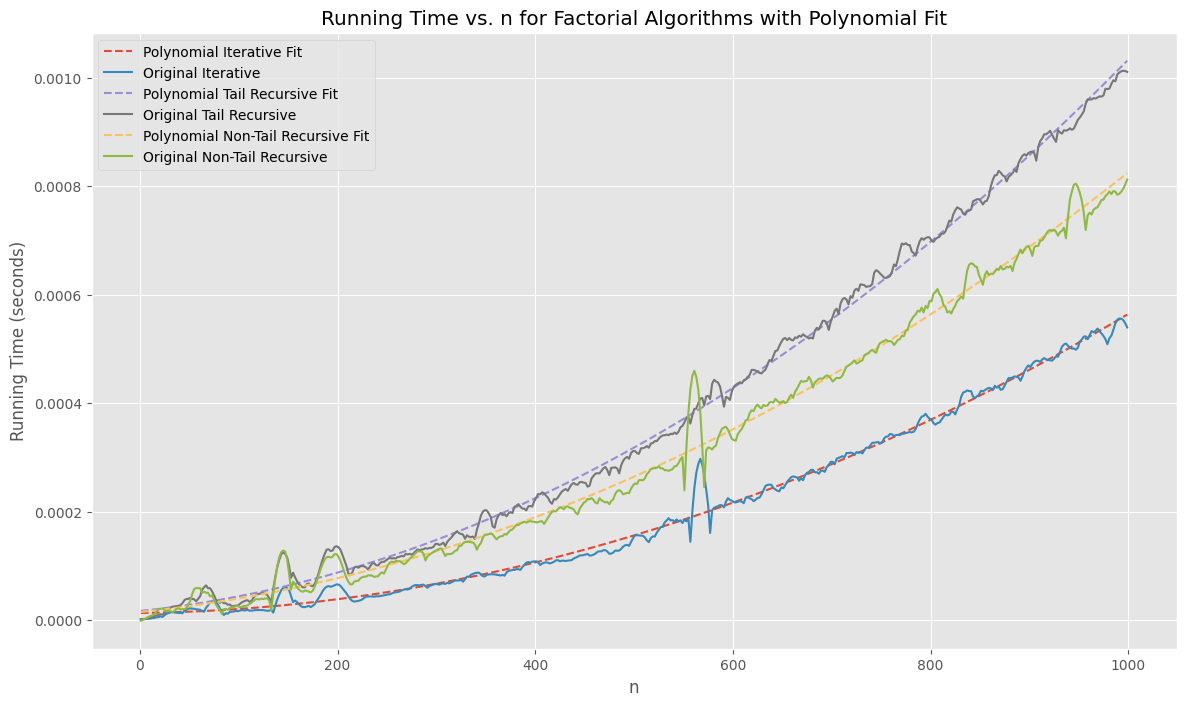

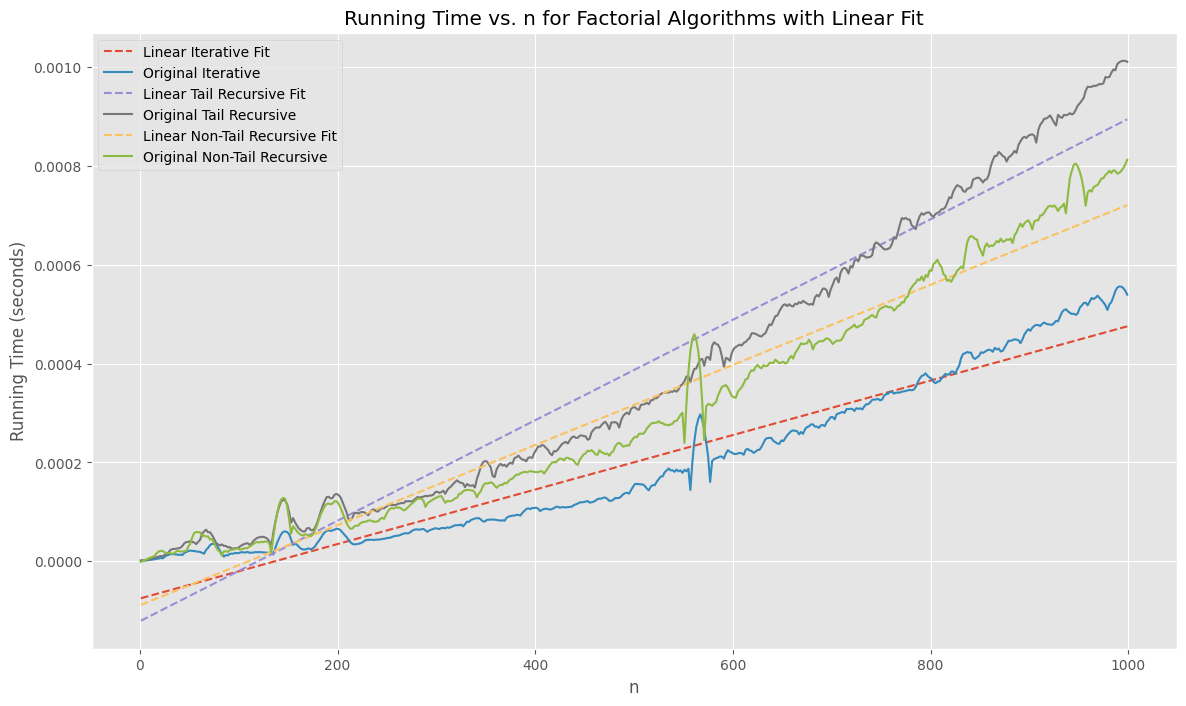

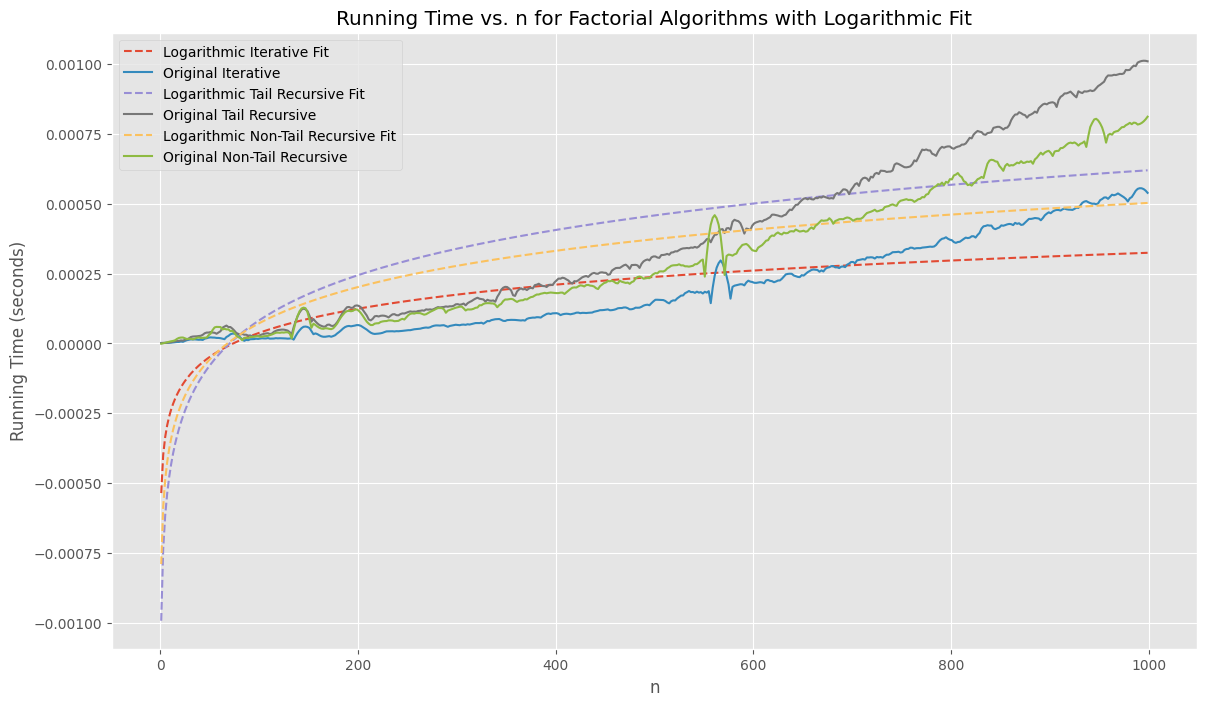

In [40]:

# Plot the fits for each model and each runtime dataset
plt.figure(figsize=(14, 8))
plt.xlabel('n')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. n for Factorial Algorithms with Polynomial Fit')

fit_and_plot(input_range, smoothed_iterative_runtimes, polynomial_model, 'Polynomial Iterative')
plt.plot(input_range, smoothed_iterative_runtimes, label=f'Original Iterative')
fit_and_plot(input_range, smoothed_tail_recursive_runtimes, polynomial_model, 'Polynomial Tail Recursive')
plt.plot(input_range, smoothed_tail_recursive_runtimes, label=f'Original Tail Recursive')
fit_and_plot(input_range, smoothed_non_tail_recursive_runtimes, polynomial_model, 'Polynomial Non-Tail Recursive')
plt.plot(input_range, smoothed_non_tail_recursive_runtimes, label=f'Original Non-Tail Recursive')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.xlabel('n')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. n for Factorial Algorithms with Linear Fit')
fit_and_plot(input_range, smoothed_iterative_runtimes, linear_model, 'Linear Iterative')
plt.plot(input_range, smoothed_iterative_runtimes, label=f'Original Iterative')
fit_and_plot(input_range, smoothed_tail_recursive_runtimes, linear_model, 'Linear Tail Recursive')
plt.plot(input_range, smoothed_tail_recursive_runtimes, label=f'Original Tail Recursive')
fit_and_plot(input_range, smoothed_non_tail_recursive_runtimes, linear_model, 'Linear Non-Tail Recursive')
plt.plot(input_range, smoothed_non_tail_recursive_runtimes, label=f'Original Non-Tail Recursive')

plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.xlabel('n')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. n for Factorial Algorithms with Logarithmic Fit')
fit_and_plot(input_range, smoothed_iterative_runtimes, logarithmic_model, 'Logarithmic Iterative')
plt.plot(input_range, smoothed_iterative_runtimes, label=f'Original Iterative')
fit_and_plot(input_range, smoothed_tail_recursive_runtimes, logarithmic_model, 'Logarithmic Tail Recursive')
plt.plot(input_range, smoothed_tail_recursive_runtimes, label=f'Original Tail Recursive')
fit_and_plot(input_range, smoothed_non_tail_recursive_runtimes, logarithmic_model, 'Logarithmic Non-Tail Recursive')
plt.plot(input_range, smoothed_non_tail_recursive_runtimes, label=f'Original Non-Tail Recursive')
plt.legend()
plt.show()

## Factorial Algorithm Time Complexity Best Fit Analysis

### Overview
When analysing the time complexity of the three factorial algorithms, which are theoretically linear (O(n)), practical runtime measurements  fit better with a polynomial curve rather than a linear one. This observation may seem counterintuitive but can be explained by various factors that influence algorithm performance beyond the theoretical complexity analysis.

### Key Points

- **Overhead and Implementation Details**
  - The linear time complexity (O(n)) describes how the number of steps grows with the input size. However, this does not account for the actual execution time of each step, which can vary due to recursion overheads, loop control mechanisms, and function call costs. These implementation details can significantly affect the runtime, especially for smaller input sizes, leading to apparent non-linear scaling in graphs.

- **Hardware and System Factors**
  - The execution time of algorithms is also influenced by hardware and system-level factors such as memory access patterns, CPU cache hits and misses, and the efficiency of memory utilization. As the input size increases, these factors can introduce non-linearities in how the runtime scales, further complicating the relationship between theoretical complexity and observed performance.

- **Polynomial vs. Linear Fit**
  - In practice, the runtime graphs of factorial algorithms can show a better fit to polynomial curves over the tested range of input sizes. This outcome is attributed to the overheads and system factors, which introduce variability in execution time not accounted for by a simple linear model.

- **Expectation vs. Reality**
  - The expectation of a linear relationship between input size and runtime stems from a theoretical analysis, assuming all operations take a constant amount of time. However, real-world factors such as implementation details and system-level influences result in a discrepancy between the expected linear scaling and the observed polynomial scaling.

### Conclusion
The discrepancy between the expected linear time complexity of the factorial algorithms and the observed polynomial fit in practical runtime analysis underscores the impact of various factors on algorithm performance. While the algorithms are theoretically O(n), real-world considerations such as overheads, hardware, and system factors can lead to non-linear scaling in practice. To gain a more accurate understanding of an algorithm's performance, it's crucial to consider these additional influences alongside theoretical complexity analysis.


## Task 3
### Implement 1 linear search algorithm and Implement 1 binary search algorithm

### 3.1 Linear Search Algorithm

In [41]:
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i  # Return the index of the target element
    return -1  # Return -1 if the target element is not found


Test the linear search algorithm.

In [42]:
test_array = [0,1,2,3,4,5,6,7,8,9,10]
target_element = 8
print("This should be 8 : ", linear_search(test_array, target_element))
print("This should be -1 : ", linear_search(test_array, 100))

This should be 8 :  8
This should be -1 :  -1


### 3.2 Binary Search Algorithm

In [43]:
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1



Test the binary search algorithm.

In [44]:
test_array = [1,2,3,4,5,6,7,8,9,10]
sorted_array = sorted(test_array)
target_element = 8
print("This should be 7 : ", binary_search(sorted_array, target_element))
print("This should be -1 : ", binary_search(sorted_array, 100))

This should be 7 :  7
This should be -1 :  -1


Create a function to find the best, worst and average search time for both linear and binary search algorithms for a certain target. 

In [80]:
def search_time(func, arr, target, num_trials=1800):
    times = timeit.repeat(lambda: func(arr, target), repeat=num_trials, number=1)
    best_time = min(times)
    worst_time = max(times) 
    avg_time = sum(times) / num_trials
    return best_time, worst_time, avg_time
    

## Execute each search algorithm multiple times with a range of search values and storing and graphing the performance times against target position in the list.
Now we are going to test the two search algorithms for targets from the iterative_runtimes list. We sort the list and then create a list of target values to search for. We then calculate the best, worst and average search time for each target value using both linear and binary search algorithms.

In [52]:
search_array = iterative_runtimes
search_array.sort()
targets = [search_array[i] for i in range(0, len(search_array), 50)]
positions = range(0, len(search_array), 50)

In [81]:
binary_search_times = {'best': [], 'worst': [], 'avg': []}
linear_search_times = {'best': [], 'worst': [], 'avg': []}

for target in targets:
    best_time, worst_time, avg_time = search_time(binary_search, search_array, target, num_trials=30000)
    binary_search_times['best'].append(best_time)
    binary_search_times['worst'].append(worst_time)
    binary_search_times['avg'].append(avg_time)

    best_time, worst_time, avg_time = search_time(linear_search, search_array, target, num_trials=30000)
    linear_search_times['best'].append(best_time)
    linear_search_times['worst'].append(worst_time)
    linear_search_times['avg'].append(avg_time)




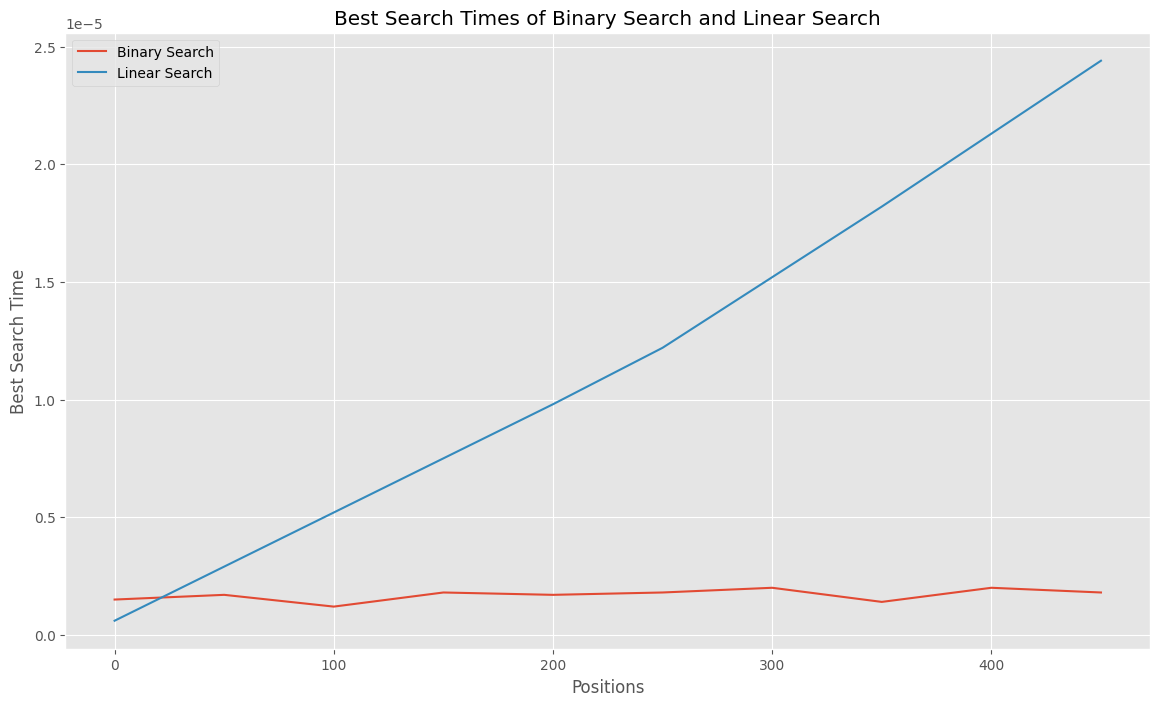

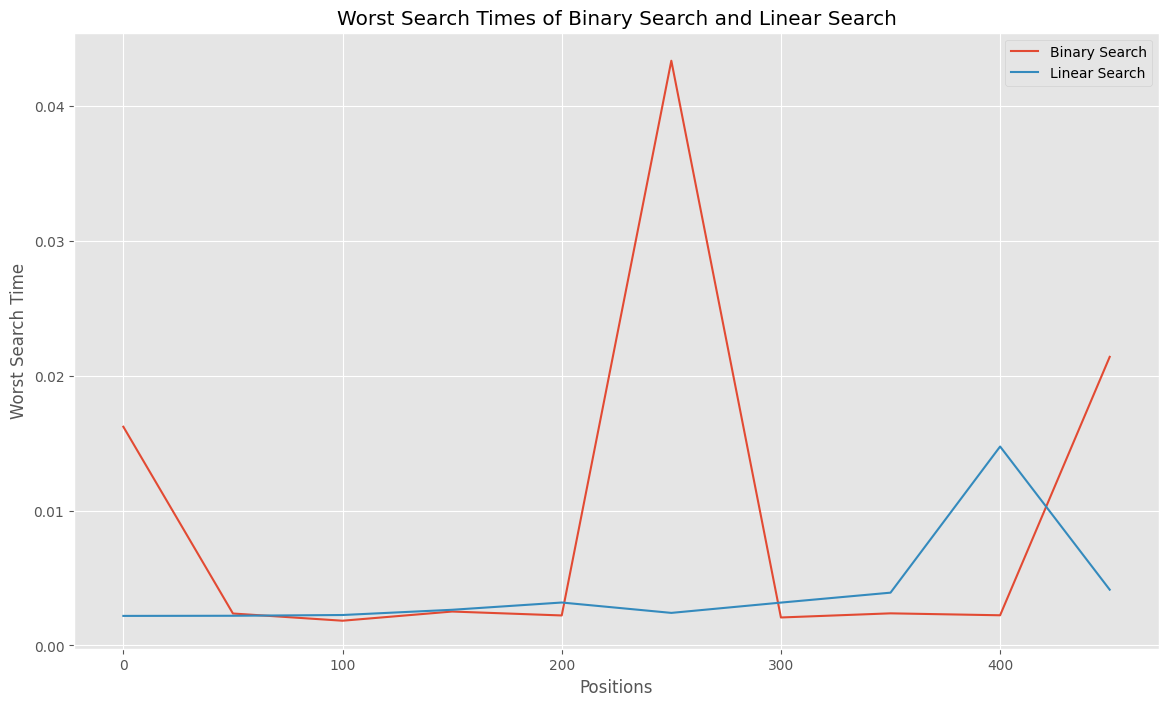

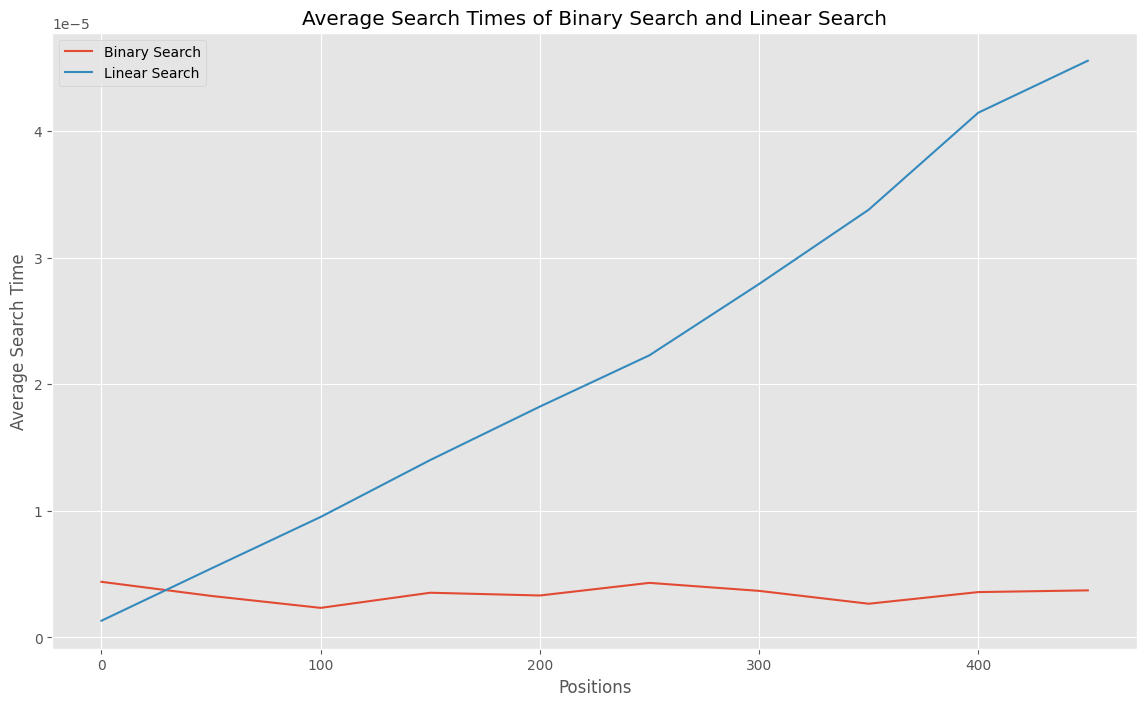

In [82]:
# Plot the best search times
plt.figure(figsize=(14, 8))
plt.plot(positions, binary_search_times['best'], label='Binary Search')
plt.plot(positions, linear_search_times['best'], label='Linear Search')
plt.xlabel('Positions')
plt.ylabel('Best Search Time')
plt.title('Best Search Times of Binary Search and Linear Search')
plt.legend()
plt.show()

# Plot the worst search times
plt.figure(figsize=(14, 8))
plt.plot(positions, binary_search_times['worst'], label='Binary Search')
plt.plot(positions, linear_search_times['worst'], label='Linear Search')
plt.xlabel('Positions')
plt.ylabel('Worst Search Time')
plt.title('Worst Search Times of Binary Search and Linear Search')
plt.legend()
plt.show()

binary_search_avg_times = binary_search_times['avg']
linear_search_avg_times = linear_search_times['avg']

plt.figure(figsize=(14, 8))
plt.plot(positions, binary_search_avg_times, label='Binary Search')
plt.plot(positions, linear_search_avg_times, label='Linear Search')
plt.style.use('ggplot')
plt.xlabel('Positions')
plt.ylabel('Average Search Time')
plt.title('Average Search Times of Binary Search and Linear Search')
plt.legend()
plt.show()


### Search Algorithm Performance Analysis

The provided graphs compare the best, worst, and average search times of binary and linear search algorithms across different target positions within a sorted list.

- **Best Search Times**: The first graph shows that the best case search time for the binary search (red line) remains constant regardless of the target's position, indicating the effectiveness of this algorithm in quickly finding the target in the best-case scenario. Conversely, the linear search (blue line) shows a gradual increase in search time as the position increases, which is expected given its O(n) time complexity.

- **Worst Search Times**: The second graph indicates an anomaly for binary search with a significant spike at a certain position. This could be due to an outlier or an error in measurement since binary search should typically not exhibit such high variances in the worst case. Linear search demonstrates a slight upward trend, but it's relatively stable, suggesting a consistent performance close to the average case scenario.

- **Average Search Times**: In the final graph, linear search shows an increasing trend in search time as the position of the target increases, which aligns with the expected linear time complexity. Binary search maintains a lower, relatively flat line, indicating its average search time is less influenced by the target's position, illustrating the algorithm's log(n) complexity.

Overall, the graphs exemplify the inherent efficiency of binary search over linear search for sorted lists, especially as the size of the list grows, which significantly impacts the performance of linear search but not binary search.


## Comparative Analysis of Search Algorithms on Varying Input Sizes

In our next evaluation, we aim to understand how the linear and binary search algorithms scale with respect to varying input sizes. This analysis will help us to visualize the practical implications of the theoretical time complexities for each algorithm.

#### Methodology:

- We'll generate a series of lists with different sizes, referred to as `n`, representing the input size.
- For each list, we will conduct a series of searches to extract the best and worst search times for both linear and binary search algorithms.
- The best case scenario will involve searching for the first element in the list for linear search or the middle element for binary search, while the worst case will involve searching for an element not present in the list.
- Each search will be repeated multiple times to ensure consistency and to average out any anomalies due to environmental factors such as system load or process scheduling.

#### Expected Outcomes:

- For the **linear search algorithm**, we anticipate that the search times will increase linearly with the input size for the worst scenario, reflecting its O(n) time complexity, however search times will be constant for best case scenario resulting in a O(1) time complexity.
- For the **binary search algorithm**, we expect a sub-linear growth in search times as the input size increases, consistent with its O(log n) time complexity, however search times will also be constant for best case scenario resulting in a O(1) time complexity..

#### Data Visualization:

- The resulting data will be plotted as graphs with the input size `n` on the x-axis and the search times on the y-axis.
- We will create separate plots for the best and worst search times to provide a comprehensive view of each algorithm's performance under different scenarios.

This analysis will highlight the importance of algorithm choice, particularly for large datasets where the efficiency of binary search can lead to significant performance improvements over linear search.


In [67]:
input_sizes = [10, 10000, 20000,30000,40000,50000,60000,70000,80000,90000]  # Example list of input sizes

binary_search_times_best = []
linear_search_times_best = []
binary_search_times_worst = []
linear_search_times_worst = []

for i in range(len(input_sizes)):
    size = input_sizes[i]
    arr = list(range(size))

    _, _, avg_time = search_time(binary_search, arr, arr[len(arr)//2])
    binary_search_times_best.append(avg_time)

    _, _, avg_time = search_time(binary_search, arr, -1)
    binary_search_times_worst.append(avg_time)

    _, _, avg_time = search_time(binary_search, arr, arr[0])
    linear_search_times_best.append(avg_time)

    _, _, avg_time = search_time(linear_search, arr, -1)
    linear_search_times_worst.append(avg_time)

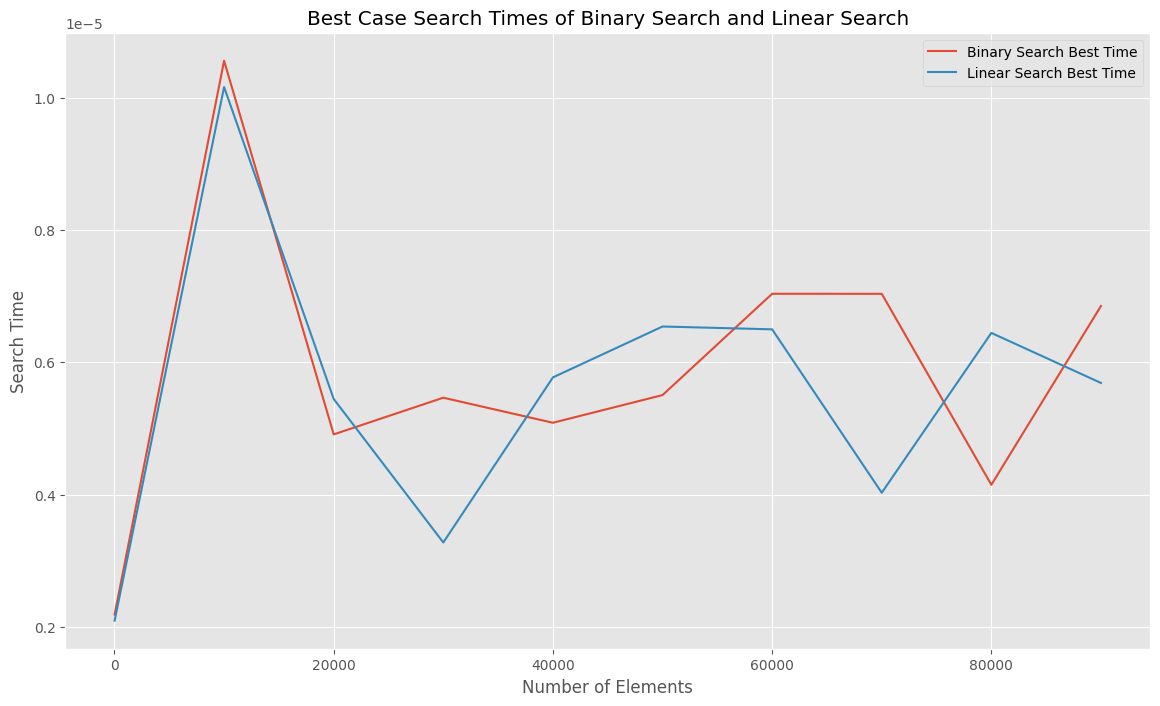

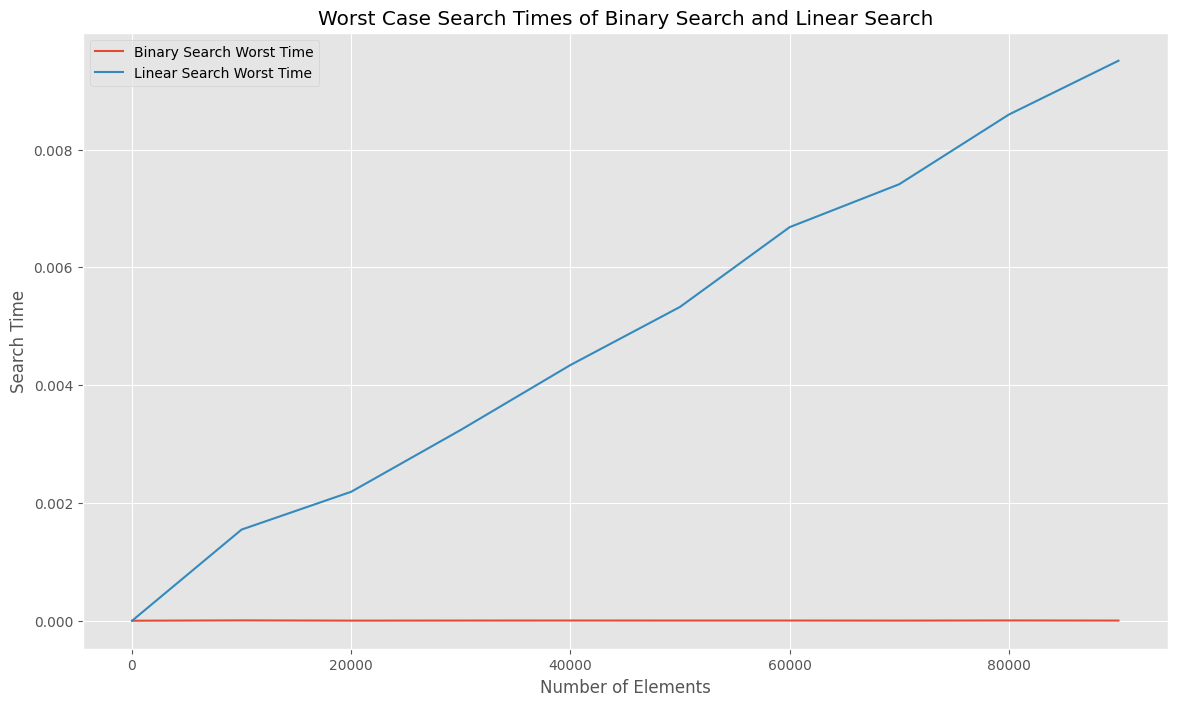

In [68]:
# Plot the best search times
plt.figure(figsize=(14, 8))
plt.plot(input_sizes, binary_search_times_best, label='Binary Search Best Time')
plt.plot(input_sizes, linear_search_times_best, label='Linear Search Best Time')
plt.xlabel('Number of Elements')
plt.ylabel('Search Time')
plt.title('Best Case Search Times of Binary Search and Linear Search')
plt.legend()
plt.show()

# Plot the worst search times
plt.figure(figsize=(14, 8))
plt.plot(input_sizes, binary_search_times_worst, label='Binary Search Worst Time')
plt.plot(input_sizes, linear_search_times_worst, label='Linear Search Worst Time')
plt.xlabel('Number of Elements')
plt.ylabel('Search Time')
plt.title('Worst Case Search Times of Binary Search and Linear Search')
plt.legend()
plt.show()




### Analysis of Best and Worst Search Times for Binary and Linear Search

#### Best Search Times:
The graph illustrates that the best search times for both binary (red line) and linear (blue line) searches remain relatively stable as the number of elements increases. This suggests that for the best case (often finding an element early in the list), linear search can be competitive with binary search.

#### Worst Search Times:
The second graph presents a stark contrast between the two algorithms. The worst search times for linear search (blue line) show a clear linear increase in line with the expected O(n) time complexity, becoming more pronounced as the list grows. Binary search (red line), however, maintains a consistent low time across all input sizes, reflecting its O(log n) efficiency. The flat trend for binary search confirms its robustness against increasing input sizes, making it significantly more scalable than linear search for large datasets.


## Curve-Fitting for Running Times

We will employ curve-fitting algorithms to approximate the functional relationship of the running times for our search algorithms. This process will help us derive equations that model the observed performance trends across different input sizes. From our research we know that linear search has a linear time complexity of O(n), while binary search has a logarithmic time complexity of O(log n) [2]. We will use this knowledge to guide our curve-fitting process. I am only going to fit a curve for the worst case scenarios as that is what we work with in the real world.

[2] https://www.codecademy.com/learn/linear-data-structures-java/modules/searching-arrays-java/cheatsheet



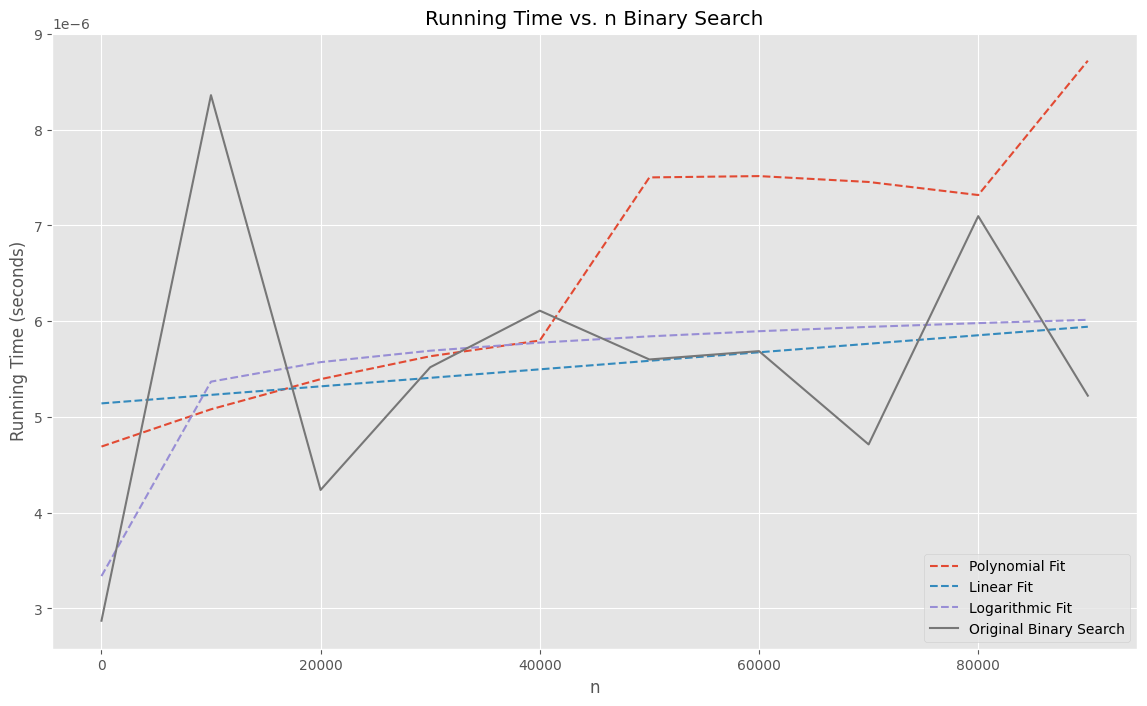

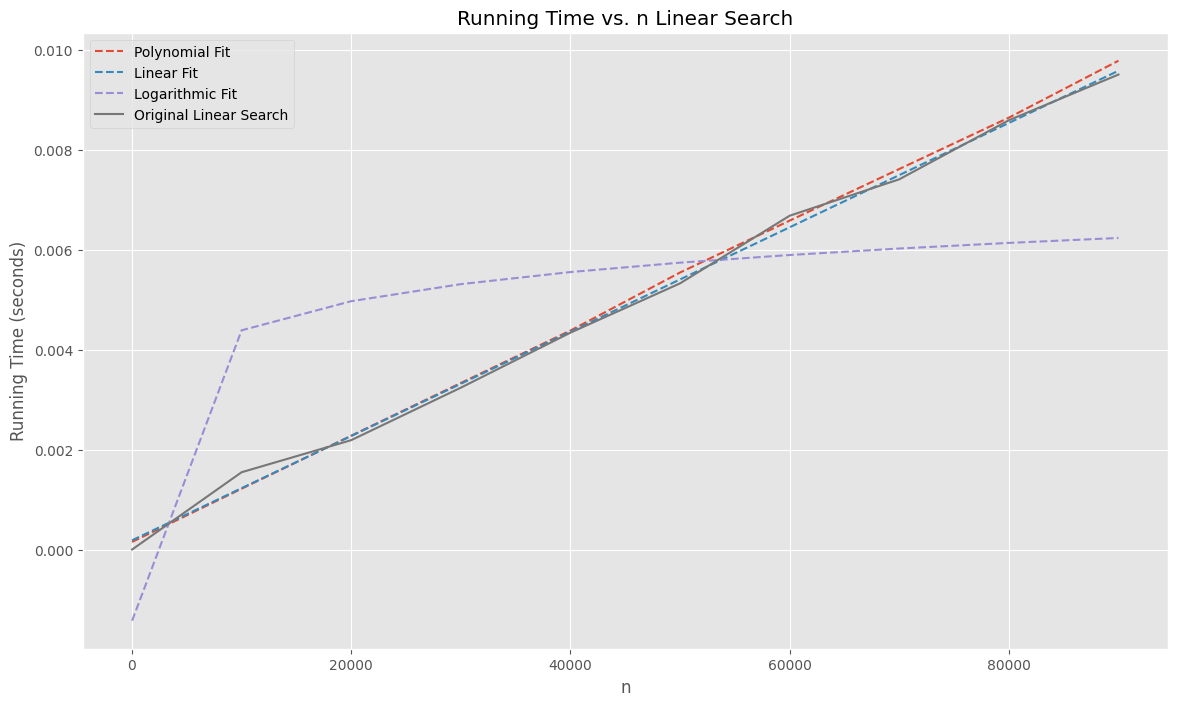

In [69]:
binary_search_times_worst = np.array(binary_search_times_worst)
linear_search_times_worst = np.array(linear_search_times_worst)

plt.figure(figsize=(14, 8))
plt.xlabel('n')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. n Binary Search')
fit_and_plot(input_sizes, binary_search_times_worst, polynomial_model, 'Polynomial')
fit_and_plot(input_sizes, binary_search_times_worst, linear_model, 'Linear')
fit_and_plot(input_sizes, binary_search_times_worst, logarithmic_model, 'Logarithmic')
plt.plot(input_sizes, binary_search_times_worst, label=f'Original Binary Search')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.xlabel('n')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. n Linear Search')
fit_and_plot(input_sizes, linear_search_times_worst, polynomial_model, 'Polynomial')
fit_and_plot(input_sizes, linear_search_times_worst, linear_model, 'Linear')
fit_and_plot(input_sizes, linear_search_times_worst, logarithmic_model, 'Logarithmic')
plt.plot(input_sizes, linear_search_times_worst, label=f'Original Linear Search')
plt.legend()
plt.show()



### Running Time Analysis for Binary and Linear Search Algorithms

#### Binary Search Analysis:
The graph for binary search displays fitted lines for polynomial, linear, and logarithmic models overlaid on the original running times. The logarithmic fit appears to align closely with the original data, underscoring binary search's O(log n) time complexity. The polynomial and linear fits do not represent the data as well, further confirming the logarithmic nature of binary search's time complexity.

#### Linear Search Analysis:
In contrast, the linear search graph shows that the linear fit closely tracks the actual running times, confirming a linear relationship between running time and input size, reflecting an O(n) time complexity. The logarithmic fit is less aligned, indicating that the time complexity of linear search is not logarithmic.


### Conclusion

Throughout this Jupyter notebook, we have conducted a basic analysis of search algorithms and factorial functions. By executing each algorithm across a range inputs, we've compared their performance and visualized the results. The use of curve-fitting algorithms has allowed us to approximate the running times with mathematical models, providing deeper insights into each algorithm's time complexity.

This project's analysis has led to a deeper understanding of resource management for algorithms, particularly in execution time and memory. It highlighted the practical application of data structures in Python and demonstrated how regression techniques can estimate an algorithm's running time. Furthermore, the ability to develop, test, and refine code was enhanced, proving essential for efficient programming practices.
